In [27]:
# Dependencies and Setup
import base64
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import base64
from requests.auth import HTTPBasicAuth
import scipy.stats as st
from pprint import pprint
import seaborn as sns
%matplotlib inline

In [28]:
# Identify the data files
track_data = "datasets/playlist_top_5_output.csv"
playlist_data = "datasets/playlist_top_5_input.csv"

# Read the track data and the playlist/genre data
track_data = pd.read_csv(track_data)
playlist_data = pd.read_csv(playlist_data)

# Combine the data into a single dataset, merge on playlist ID, unique ID
merge = pd.merge(track_data, playlist_data, on="Playlist ID", how="outer")
#Convert track duration from milliseconds to minutes with decimal. ie, 2 mins 30 seconds is 2.5 mins
merge["Track Duration"] = merge["Track Duration"]/60000

#merge.drop_duplicates(subset ="Track ID", keep = 'first', inplace = True)

#Print head
merge.head()

,Playlist ID,Track ID,Track Position,Track Name,Track Added At,Track Popularity,Track Duration,Available Markets,Album,Album Type,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Name,Genre
0,37i9dQZF1DXcBWIGoYBM5M,2usxQITOSDqvkYiI0oIwao,1,You should be sad,2020-01-29T19:04:50Z,89,3.424550,79,You should be sad,single,...,0.591,0.585,0.000000,0.1090,-6.350,0.0277,0.324,110.940,Today's Top Hits,Pop
1,37i9dQZF1DXcBWIGoYBM5M,0nbXyq5TXYPCO7pr3N8S4I,2,The Box,2020-01-29T19:04:50Z,100,3.277533,78,Please Excuse Me For Being Antisocial,album,...,0.896,0.586,0.000000,0.7900,-6.687,0.0559,0.642,116.971,Today's Top Hits,Pop
2,37i9dQZF1DXcBWIGoYBM5M,2Fxmhks0bxGSBdJ92vM42m,3,bad guy,2020-01-29T19:04:50Z,95,3.234783,79,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",album,...,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128,Today's Top Hits,Pop
3,37i9dQZF1DXcBWIGoYBM5M,0sf12qNH5qcw8qpgymFOqD,4,Blinding Lights,2020-01-29T19:04:50Z,98,3.359550,79,Blinding Lights,single,...,0.513,0.796,0.000209,0.0938,-4.075,0.0629,0.345,171.017,Today's Top Hits,Pop
4,37i9dQZF1DXcBWIGoYBM5M,4TnjEaWOeW0eKTKIEvJyCa,5,Falling,2020-01-29T19:04:50Z,98,2.656350,79,Falling,single,...,0.784,0.430,0.000000,0.0887,-8.756,0.0364,0.236,127.087,Today's Top Hits,Pop


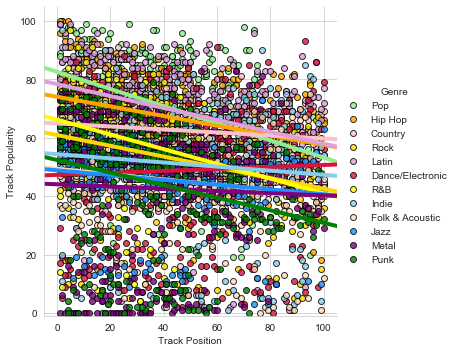

In [29]:
# Establish color dictionary for each genre
color_dict = dict({'Country': "Pink",
                   'Dance/Electronic': "Crimson",
                   'Folk & Acoustic': "Peachpuff",
                   'Hip Hop': "Orange",
                   'Indie': "skyblue",
                   'Jazz': "dodgerblue",
                   'Latin': "plum",
                   'Metal': "purple",
                   'Pop': "lightgreen",
                   'Punk': "green",
                   'R&B': "yellow",
                   'Rock': "gold"
                  })

# set gridmarks 
sns.set_style('whitegrid')

# create basic scatterplot
fig = sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=merge, palette=color_dict, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={"lw":4})
# Set axis limits
plt.ylim(-1, 105)
plt.xlim(-5, 105)

# Show plot
plt.show()

# Save plot
fig.savefig("output_Track_Position_Popularity.png", dpi=200)

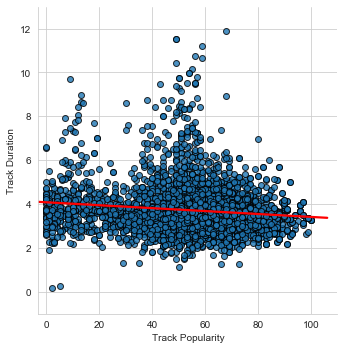

In [30]:
# set gridmarks
sns.set_style('whitegrid') 
# basic scatterplot
fig = sns.lmplot(x="Track Popularity", y="Track Duration", data=merge, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})

# Axis limits
plt.ylim(-1, 13)
plt.xlim(-3, 110)

#Show Plot
plt.show()

#Save output figure
fig.savefig("output_Track_Duration_Popularity.png", dpi=200)

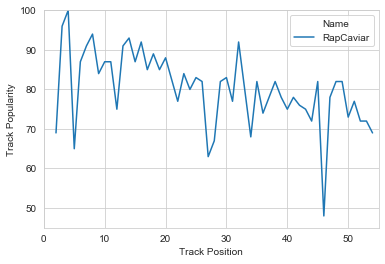

In [31]:
# Set dataframe and group by playlist ID
play_df = merge.groupby(['Playlist ID'])
# Set dataframe to one specific playlist ID
play_df = play_df.get_group('37i9dQZF1DX0XUsuxWHRQd')


# Basic lineplot for trend of specific playlists song popularity against track position
snsplot=sns.lineplot(x='Track Position', y='Track Popularity', hue='Name', data=play_df)
fig=snsplot.get_figure()
plt.ylim(45, 100)
plt.xlim(0, 55)
fig.savefig("output_rap_caviar_playlist_spot_popularity.png", dpi=200)

In [32]:
# Summary Stats by genre in case needed. 
#Genre_avg = merge.groupby('Genre')
#Genre_avg = Genre_avg.mean()
#Genre_avg = Genre_avg.reset_index()
# Display the df
#Genre_avg

In [33]:
#Group by genre and track position, mean taken for all tracks in that given track position
gen_play = merge.groupby(['Genre', 'Track Position']).mean()
gen_play = gen_play.reset_index()
#Limit to Hip Hop only for graphing trends
gen_play = gen_play[gen_play['Genre']=='Hip Hop']
#Display the df
gen_play

,Genre,Track Position,Track Popularity,Track Duration,Available Markets,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
300,Hip Hop,1,81.5,3.216704,78.25,6.0,0.25,4.0,0.088525,0.71725,0.6640,0.000000e+00,0.32225,-6.09425,0.338225,0.63725,151.2415
301,Hip Hop,2,77.8,2.817097,78.00,8.0,0.20,4.0,0.082635,0.86560,0.6558,2.040000e-07,0.28784,-6.77760,0.233180,0.62800,109.9678
302,Hip Hop,3,75.2,3.063927,78.80,7.6,0.60,4.0,0.110620,0.73680,0.7084,1.392000e-03,0.29622,-6.26300,0.322200,0.68580,135.2796
303,Hip Hop,4,82.4,3.366457,75.60,6.4,0.40,4.0,0.068060,0.83860,0.5850,4.540000e-03,0.27878,-6.06000,0.142200,0.58440,128.3912
304,Hip Hop,5,72.6,3.041523,77.00,8.2,0.40,3.8,0.086984,0.71300,0.6362,1.366000e-04,0.21380,-6.27820,0.272380,0.55300,141.6706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Hip Hop,96,45.0,3.565325,39.50,6.0,1.00,4.0,0.037350,0.84200,0.6670,1.205000e-05,0.12000,-4.50250,0.326000,0.42400,160.0560
396,Hip Hop,97,47.5,2.936400,39.00,3.5,1.00,4.0,0.162300,0.69550,0.7255,0.000000e+00,0.08015,-5.83400,0.324500,0.66450,124.4190
397,Hip Hop,98,47.0,2.748075,39.00,2.5,0.50,4.0,0.191000,0.78450,0.5360,0.000000e+00,0.08740,-8.99600,0.274000,0.25500,142.3855
398,Hip Hop,99,39.0,2.588667,39.00,1.0,0.50,4.0,0.191000,0.74000,0.6650,0.000000e+00,0.08300,-6.40000,0.385000,0.24500,83.1580


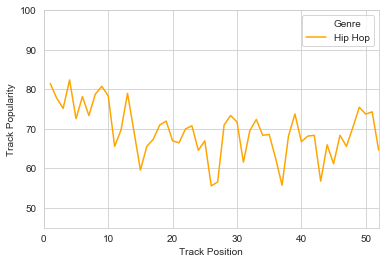

In [9]:
# Basic lineplot for trend of specific genres song popularity against track position
snsplot=sns.lineplot(x='Track Position', y='Track Popularity', hue='Genre', data=gen_play, palette=color_dict)

#Set Axis limits
plt.ylim(45, 100)
plt.xlim(0, 52)#limited to 52 since only two playlists had more than 50 songs in the Hip Hop Genre

#Display figure
fig=snsplot.get_figure()

#Save output figure
fig.savefig("output_hip_hop_playlist_spot_popularity.png", dpi=200)

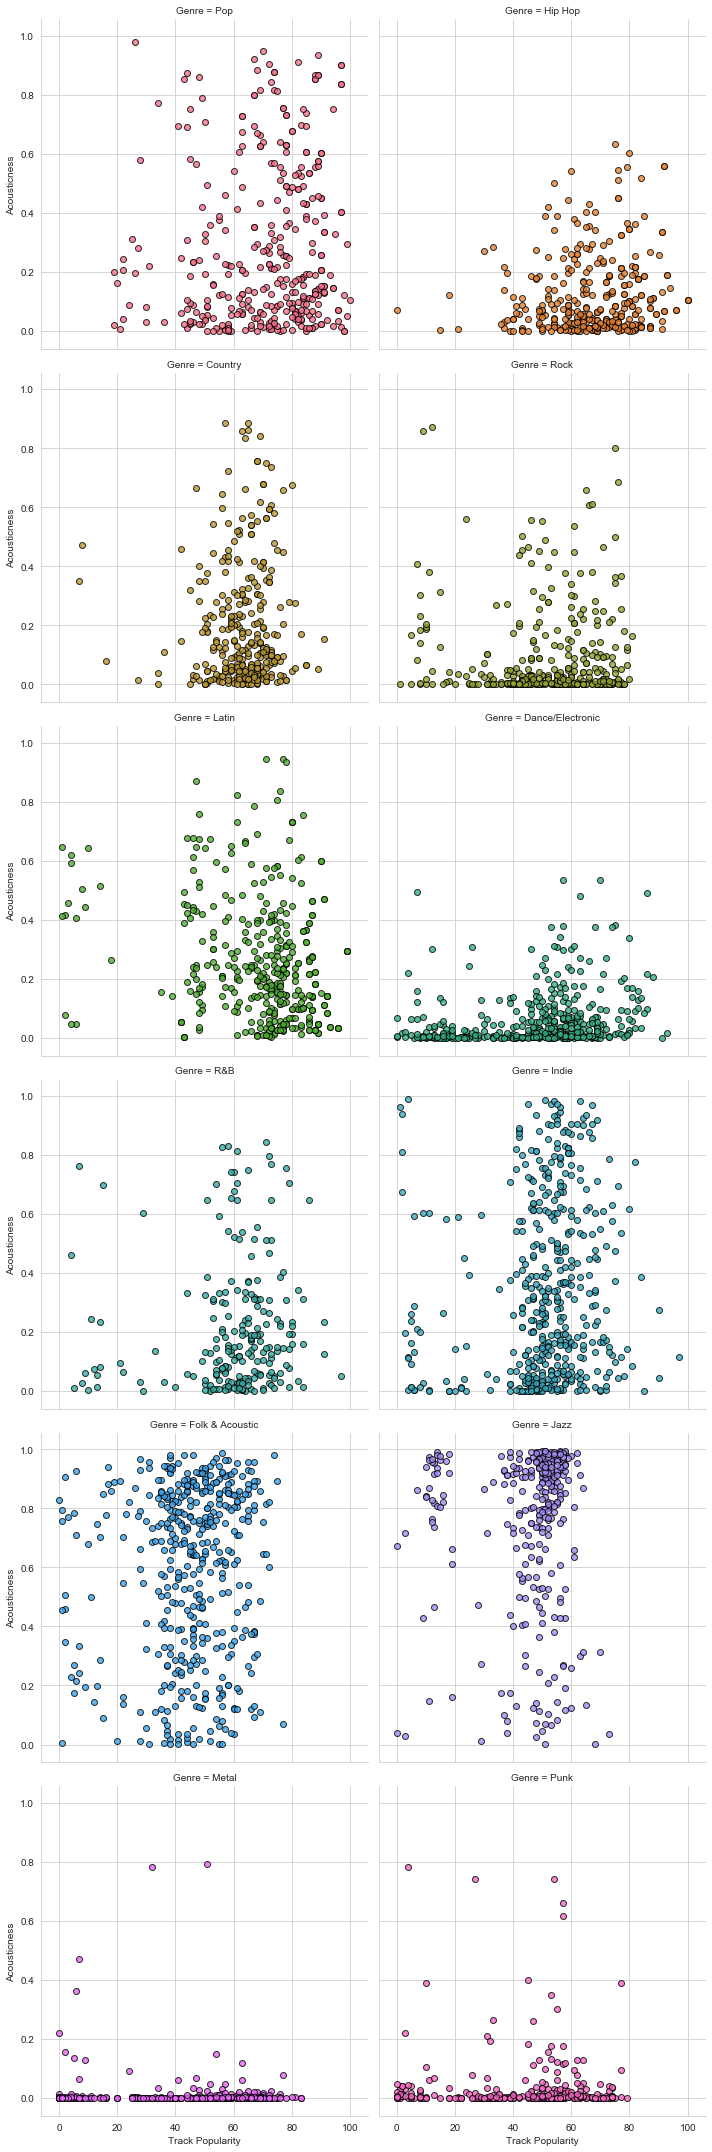

In [12]:
#wrapped scatter plot of "Track Popularity" v "Acousticness" for each genre
fig = sns.lmplot("Track Popularity", "Acousticness", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Acousticness_Popularity.png", dpi=200)

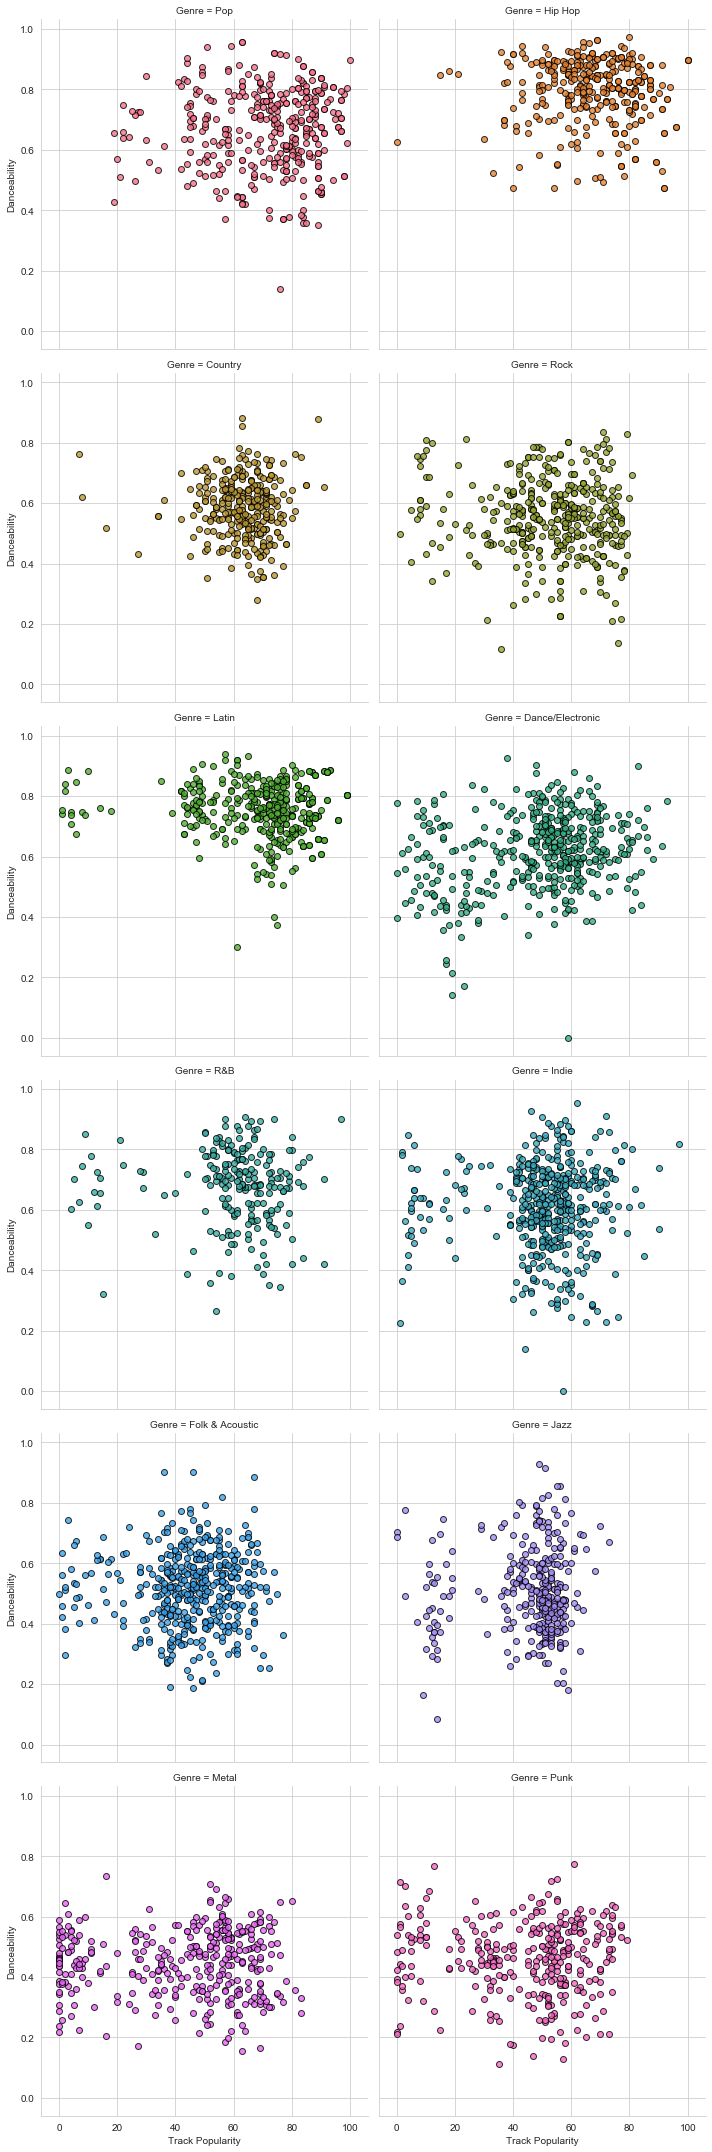

In [13]:
#wrapped scatter plot of "Track Popularity" v "Danceability" for each genre
fig = sns.lmplot("Track Popularity", "Danceability", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Danceability_Popularity.png", dpi=200)

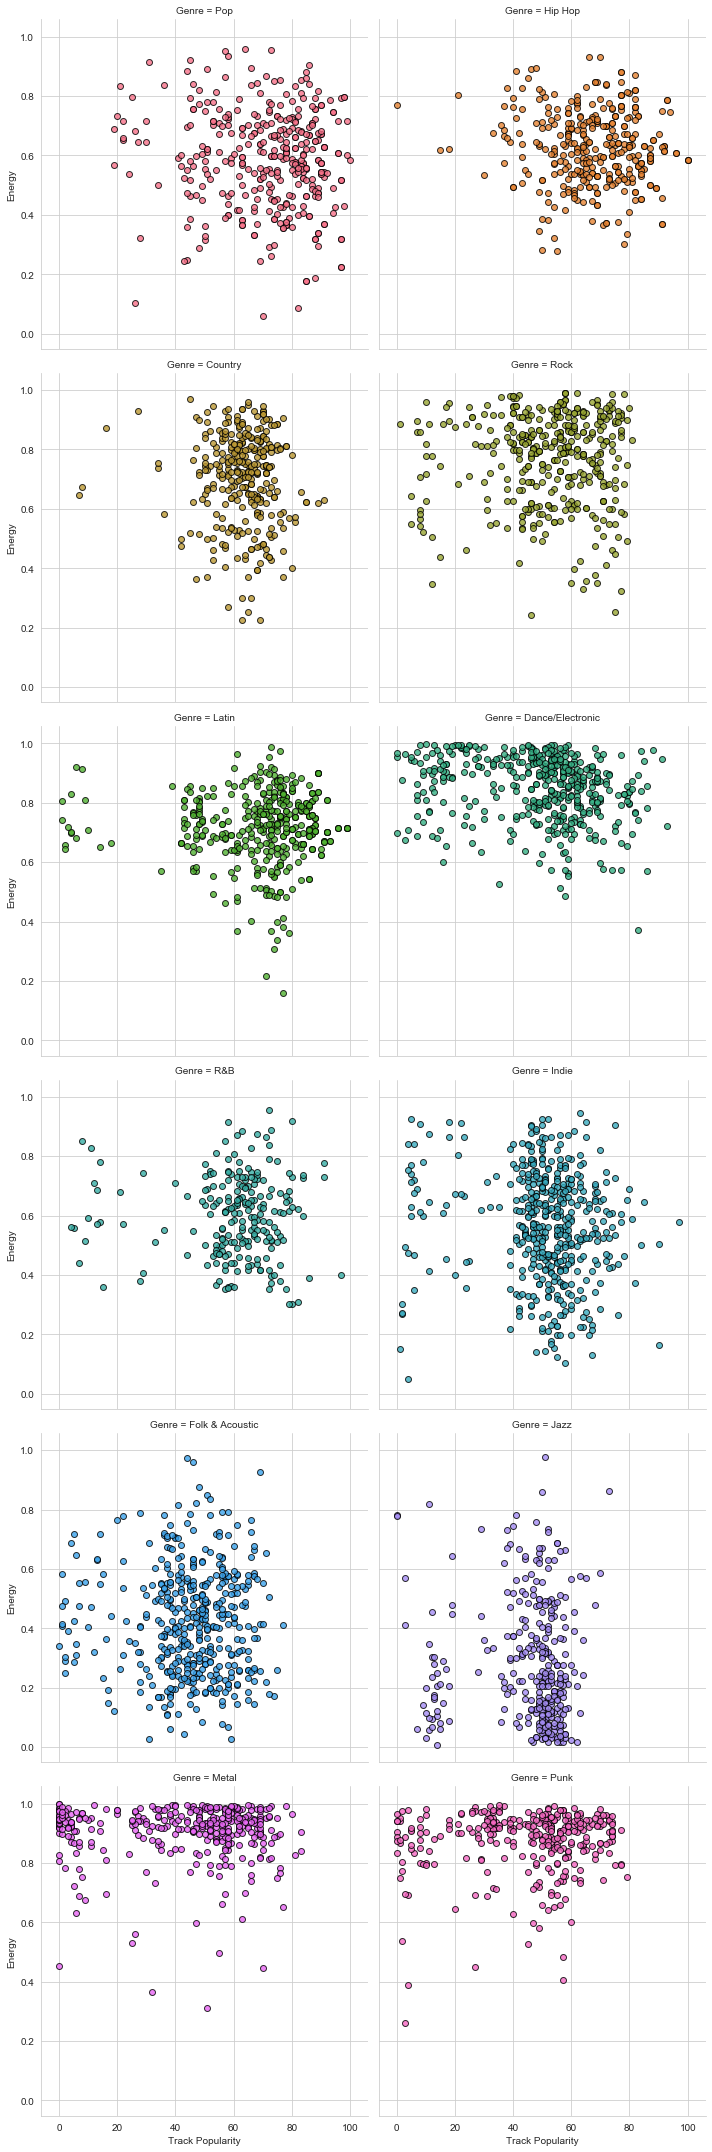

In [14]:
#wrapped scatter plot of "Track Popularity" v "Energy" for each genre
fig = sns.lmplot("Track Popularity", "Energy", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Energy_Popularity.png", dpi=200)

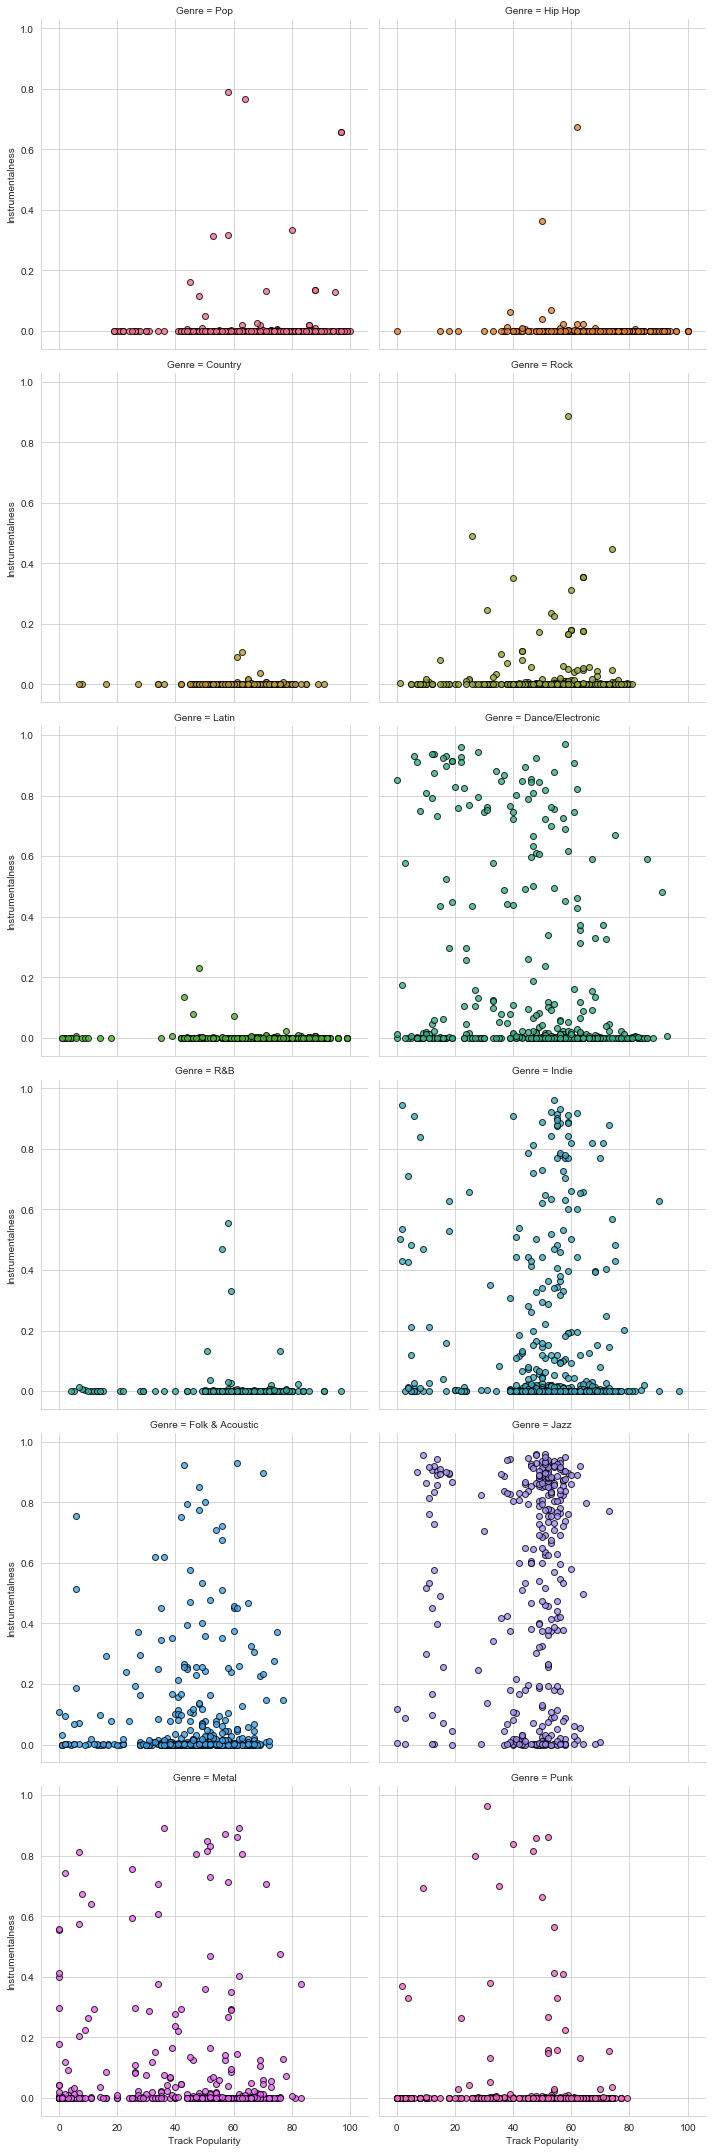

In [15]:
#wrapped scatter plot of "Track Popularity" v "Instrumentalness" for each genre
fig = sns.lmplot("Track Popularity", "Instrumentalness", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Instrumentalness_Popularity.png", dpi=200)

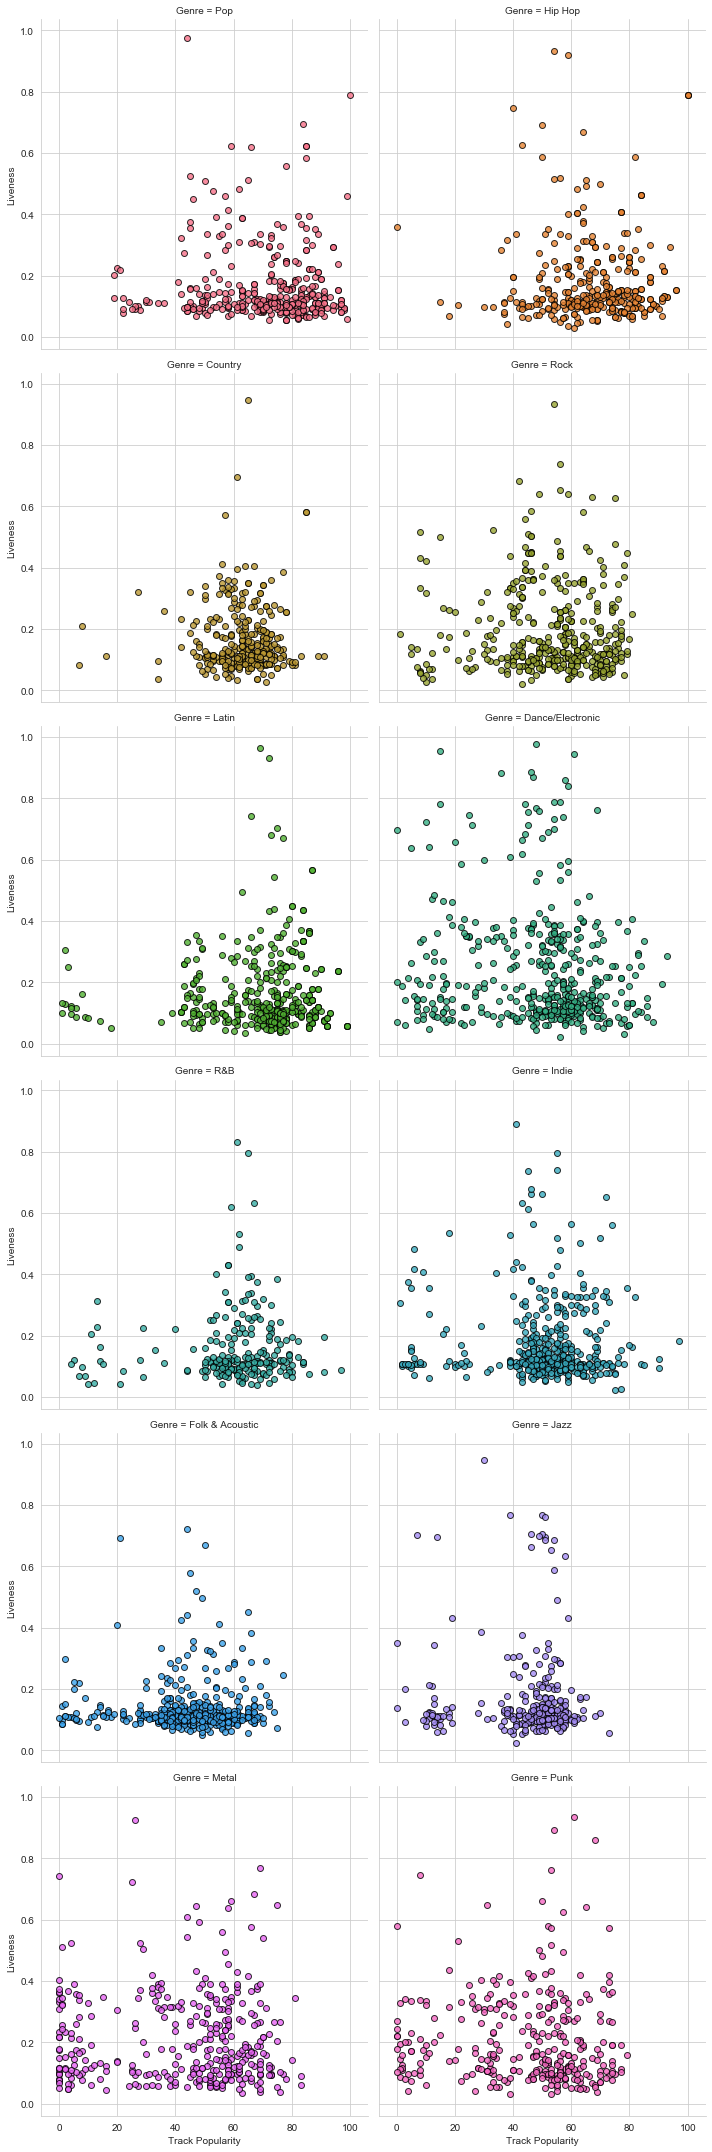

In [16]:
#wrapped scatter plot of "Track Popularity" v "Liveness" for each genre
fig = sns.lmplot("Track Popularity", "Liveness", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Liveness_Popularity.png", dpi=200)

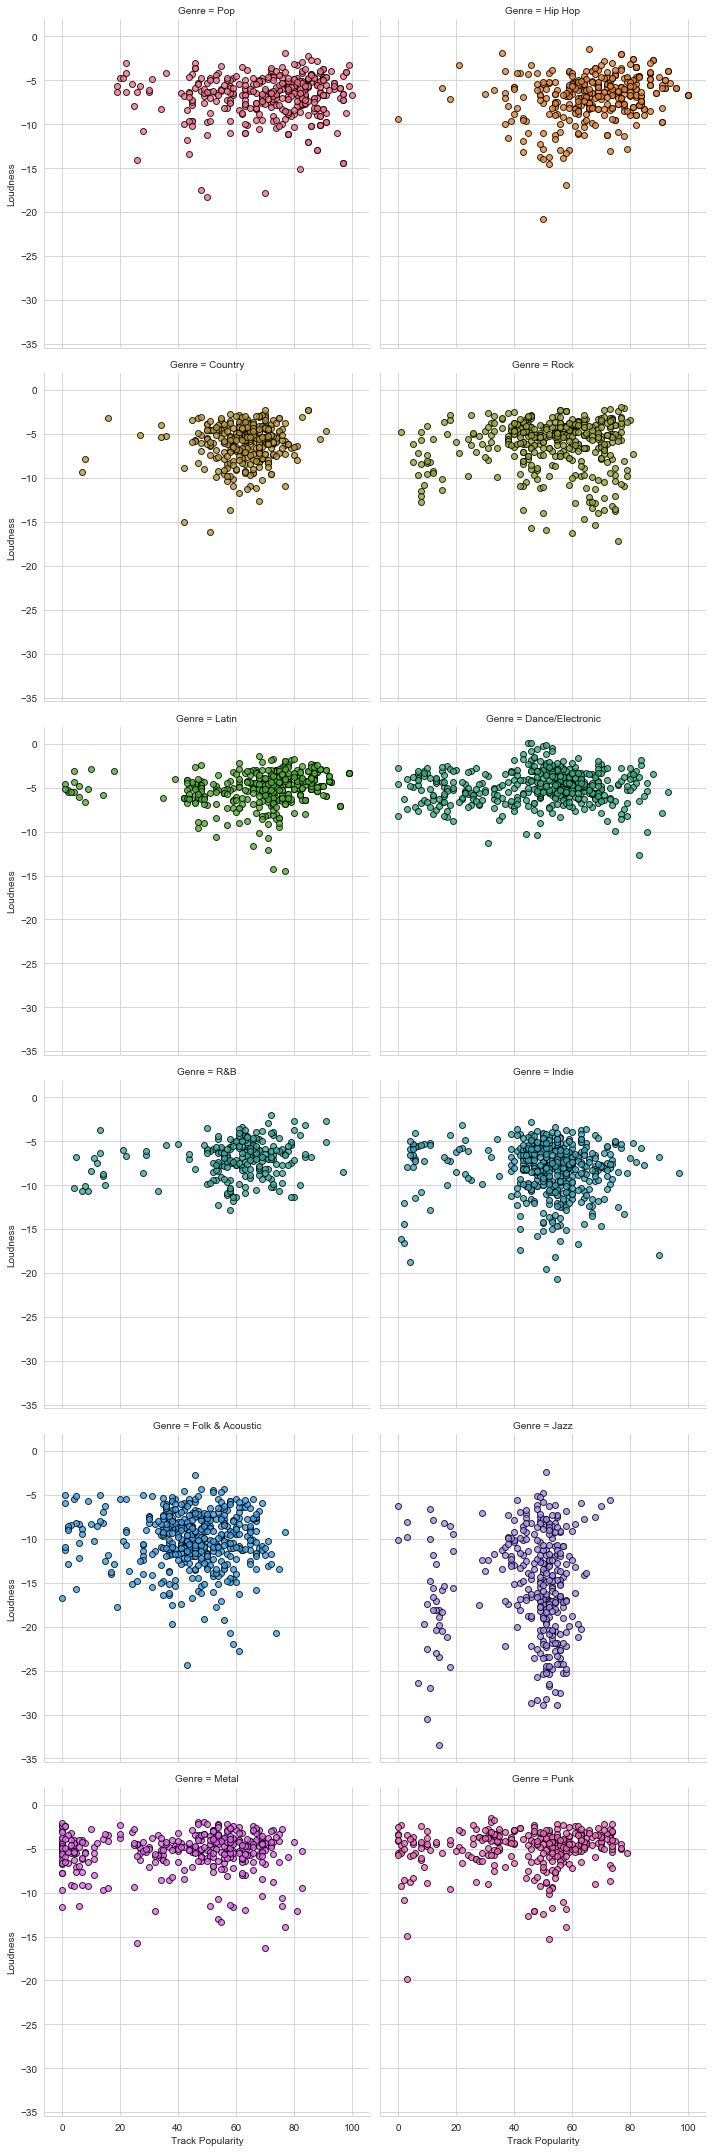

In [17]:
#wrapped scatter plot of "Track Popularity" v "Loudness" for each genre
fig = sns.lmplot("Track Popularity", "Loudness", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Loudness_Popularity.png", dpi=200)

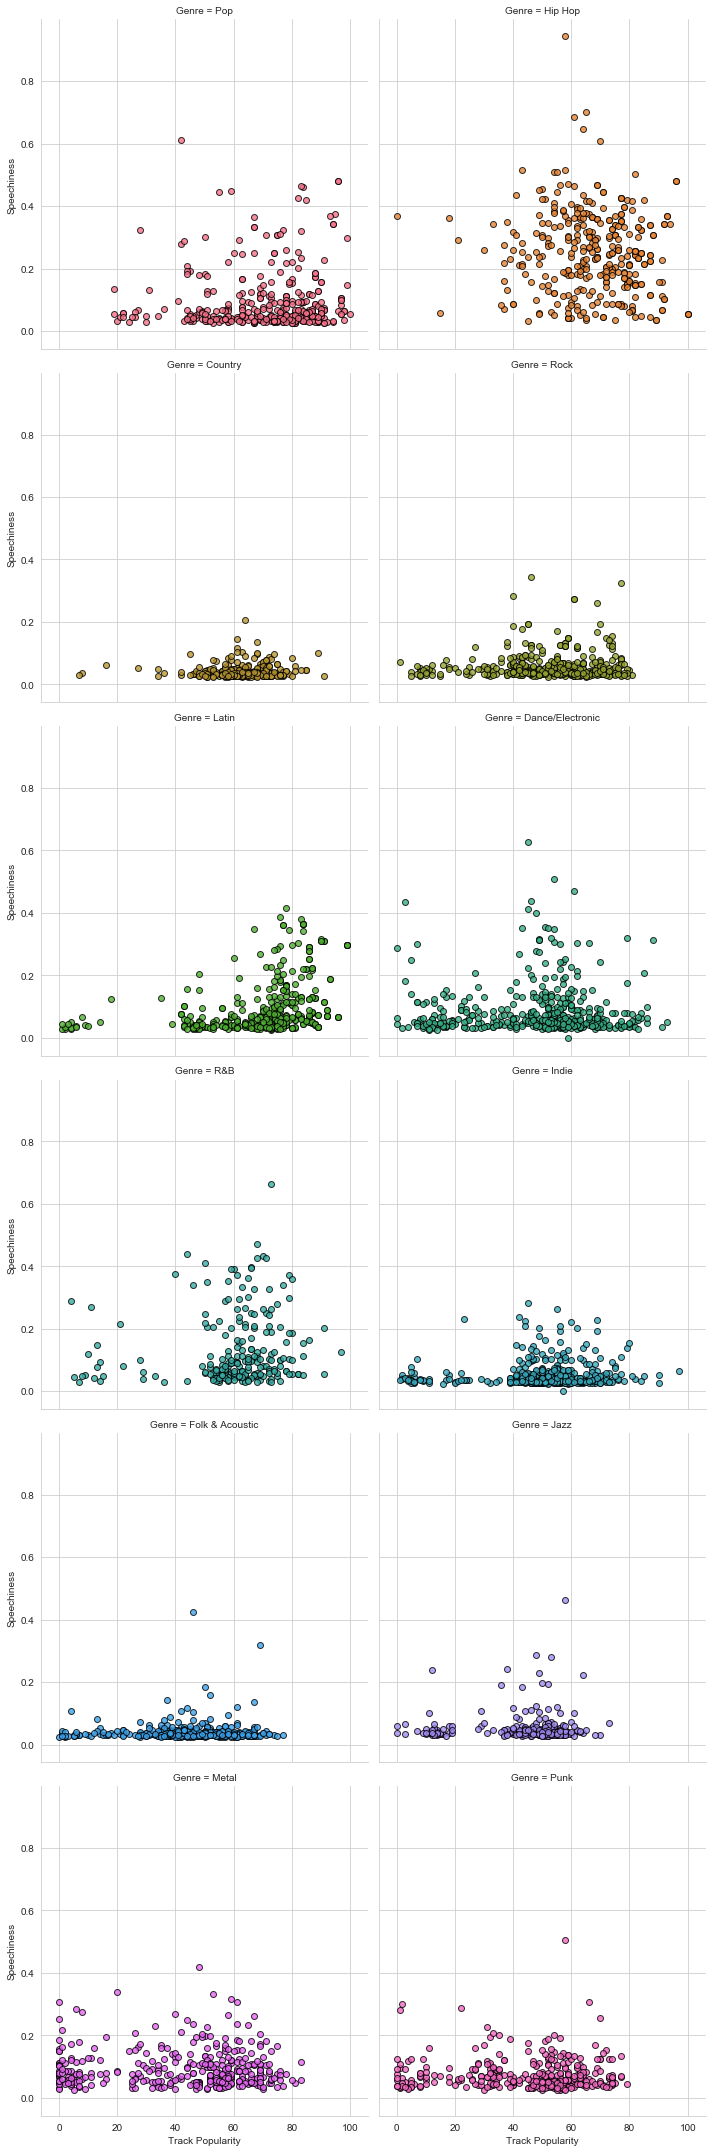

In [18]:
#wrapped scatter plot of "Track Popularity" v "Speechiness" for each genre
fig = sns.lmplot("Track Popularity", "Speechiness", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Speechiness_Popularity.png", dpi=200)

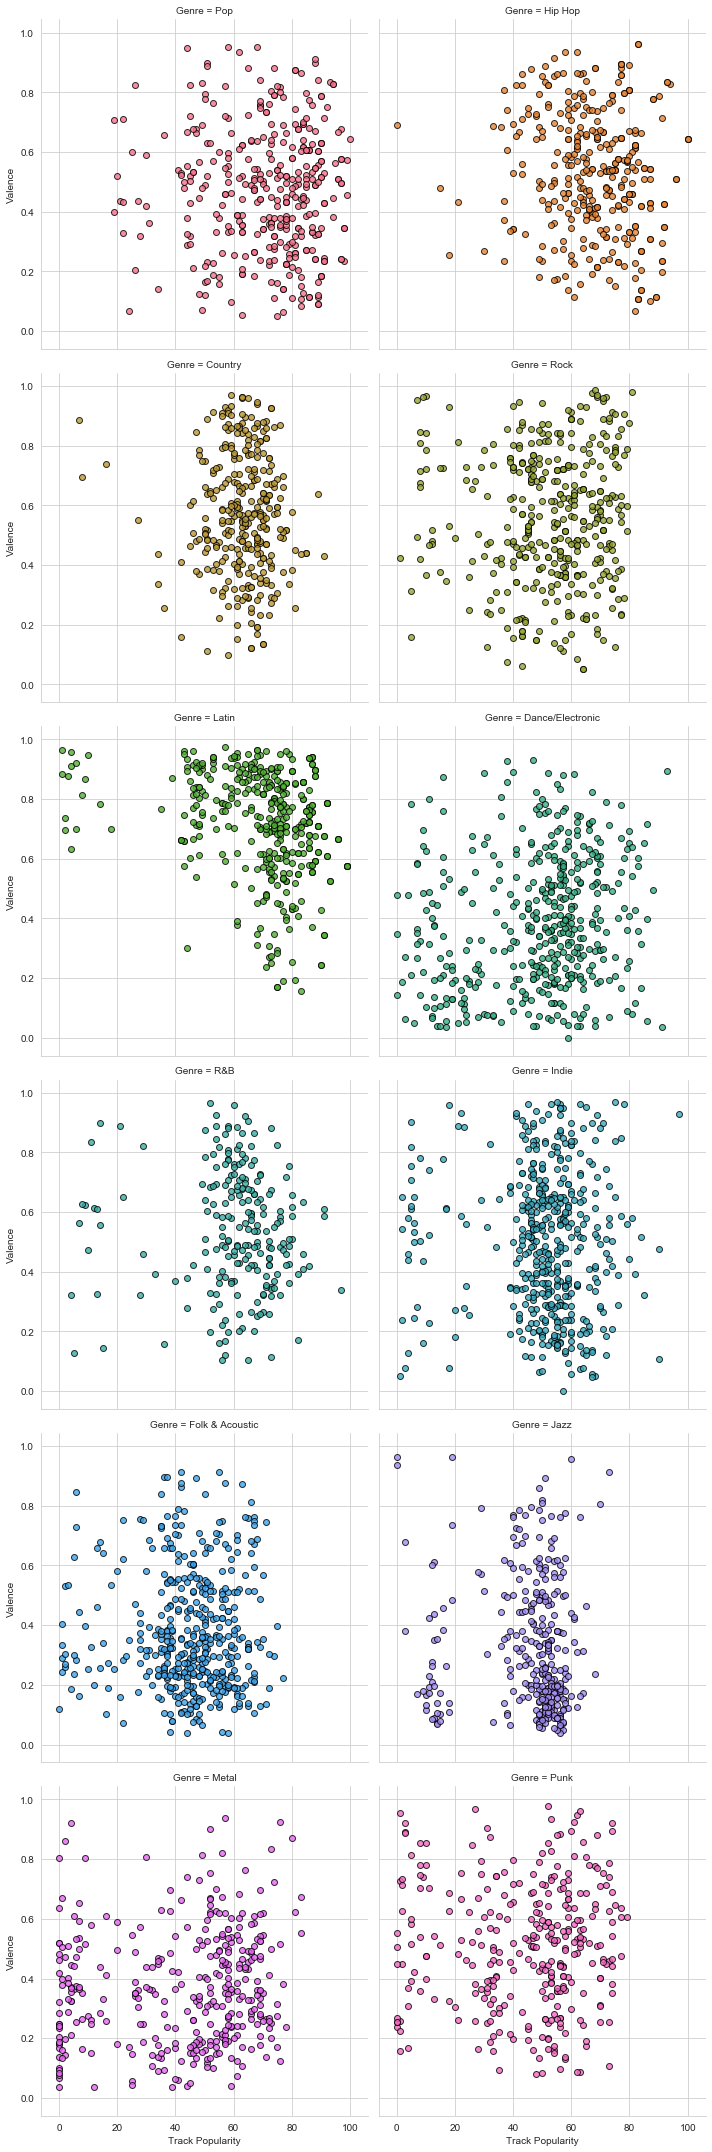

In [19]:
#wrapped scatter plot of "Track Popularity" v "Valence" for each genre
fig = sns.lmplot("Track Popularity", "Valence", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Valence_Popularity.png", dpi=200)

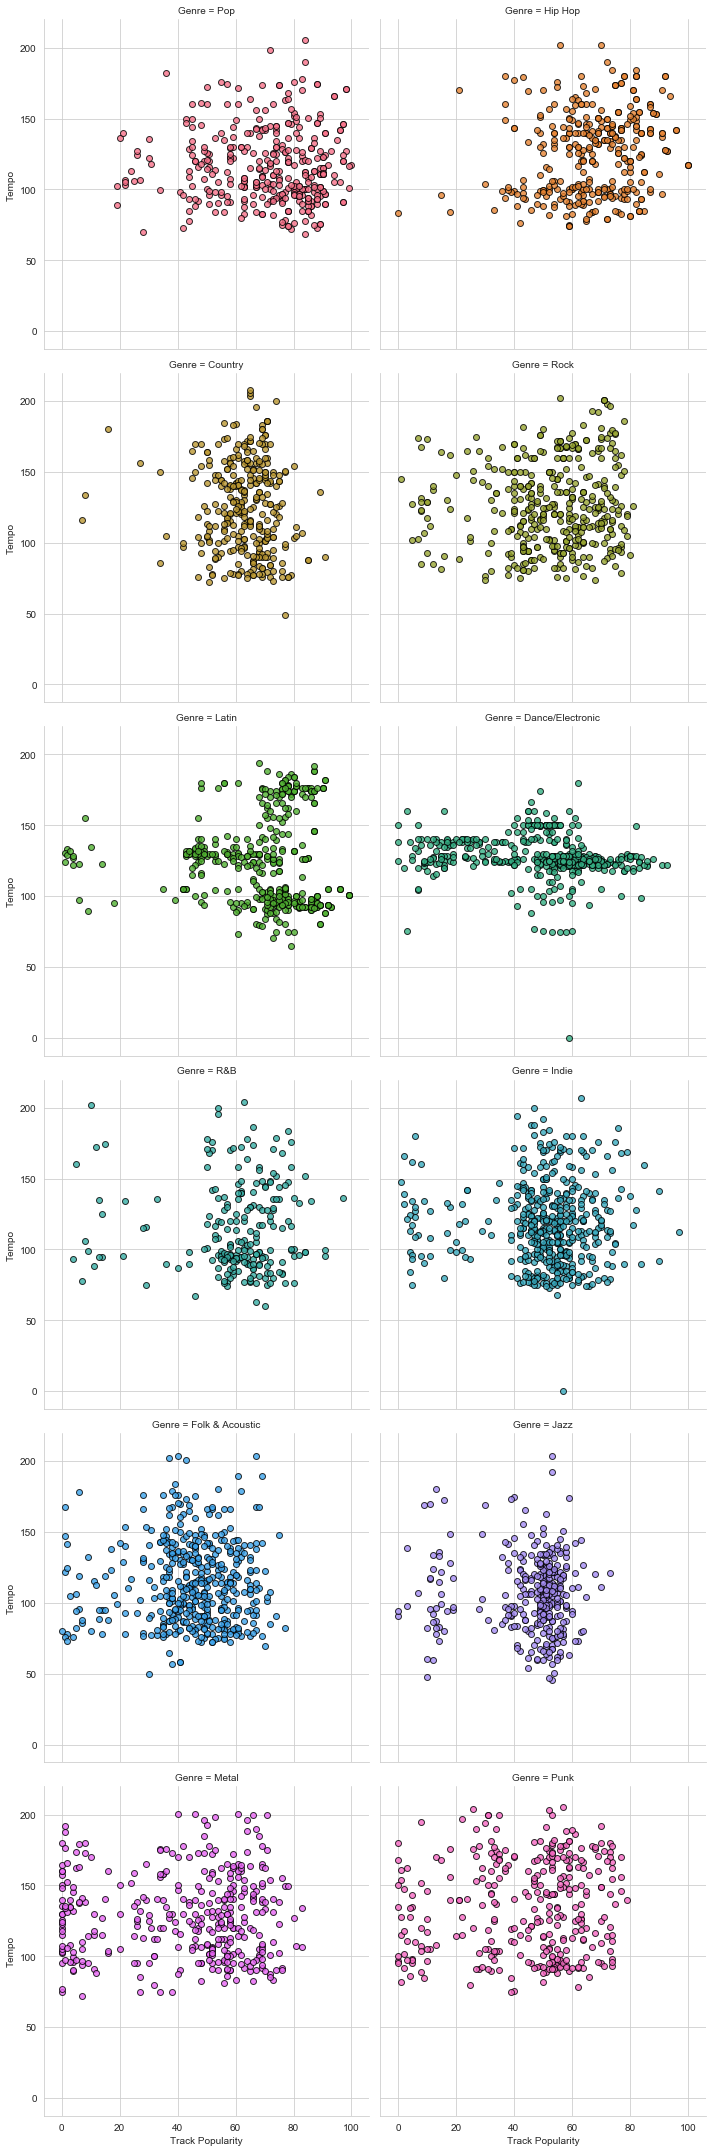

In [20]:
#wrapped scatter plot of "Track Popularity" v "Tempo" for each genre
fig = sns.lmplot("Track Popularity", "Tempo", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("output_Tempo_Popularity.png", dpi=200)

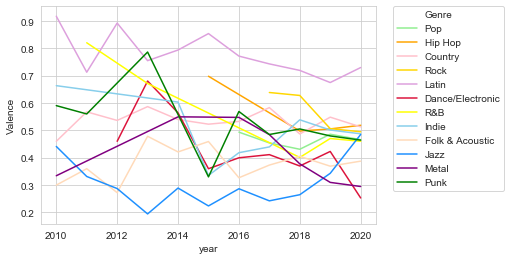

In [21]:

#Insert column and convert Release Date to year only, store in new column
merge['year'] = pd.DatetimeIndex(merge['Release Date']).year
#DataFrame to filter only to release dates for 2010 or newer
merge = merge[(merge["year"] >= 2010)]

# basic scatterplot to trend Valence (song positivity) v year of release
snsplot=sns.lineplot(x='year', y='Valence', hue='Genre', data=merge, palette=color_dict,err_style=None)

# move legend outside of chart
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plot figure
fig=snsplot.get_figure()

#export figure
fig.savefig("output_Valence_Year.png", dpi=200)

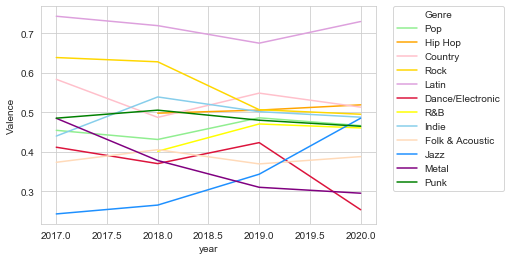

In [22]:
#reduce df to prior three years to zoom in on trend
merge = merge[(merge["year"] >= 2017)]

# basic scatterplot to trend Valence (song positivity) v year of release
snsplot=sns.lineplot(x='year', y='Valence', hue='Genre', data=merge, palette=color_dict,err_style=None)

# move legend outside of chart
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plot figure
fig=snsplot.get_figure()

#export figure
fig.savefig("output_Valence_Year_zoom.png", dpi=200)

In [ ]:
#Here in case we decide to do a bar chart instead of line plot for the above

#merge['year'] = pd.DatetimeIndex(merge['Release Date']).year
#DataFrame to filter only the Northern Hemisphere
#merge = merge[(merge["year"] >= 2010)]
#merge.head()

#sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
#g = sns.barplot(x = 'year', y = 'Valence', hue = 'Genre', data = merge,
#            palette = color_dict,
#            capsize = 0.05,             
#            saturation = 8,             
#            errwidth = 0,  
#            ci = 'sd'   
#            )
#(x="year", y="Valence", hue="Genre", data=merge, height=6, kind="bar", palette=color_dict)


#g.despine(left=True)
#g.set_ylabels("Valence")